In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
from pyphen import Pyphen
from textstat import syllable_count, flesch_reading_ease, automated_readability_index
import matplotlib.pyplot as plt


In [3]:
def calculate_helpfulness(text, rating):
	# Preprocessing
	tokens = nltk.word_tokenize(text)
	tokens = [t for t in tokens if t.isalpha() and t.lower() not in nltk.corpus.stopwords.words('english')]
	text = ' '.join(tokens)

	# Text Metrics Extraction
	word_count = len(tokens)
	sentence_count = len(nltk.sent_tokenize(text))
	# syllable_count = Pyphen().inserted(text).count('-') + 1
	character_count = len(text.replace(' ', ''))
	fres_score = flesch_reading_ease(text)
	ari_score = automated_readability_index(text)

	# Sentiment Analysis
	sia = SentimentIntensityAnalyzer()
	sentiment_scores = sia.polarity_scores(text)

	# Calculate Helpfulness Score
	helpfulness_score = 0
	unhelpfulness_score = 0
	if sentiment_scores['compound'] >= 0.05:
    
	# method 1:

		# helpfulness_score += 1
		# helpfulness_score += word_count // 5
		# helpfulness_score += sentence_count // 2
		# helpfulness_score += syllable_count // 10
		# helpfulness_score += character_count // 50
	
 
 	# method 2:

		helpfulness_score = (rating * 0.2) + (character_count * 0.1) + (
        word_count * 0.1) + (sentence_count * 0.1) + (100 - fres_score) * 0.2 + (ari_score * 0.2)

	elif sentiment_scores['compound'] <= -0.05:
		unhelpfulness_score += 1

	# Normalize Scores
	helpfulness_score = (helpfulness_score / len(text)) * 100
	unhelpfulness_score = (unhelpfulness_score / len(text)) * 100

	return helpfulness_score, unhelpfulness_score, sentiment_scores['compound']



In [190]:
with open('C:/Hammad Aslam/BS IT (post ADP)/3rd Semester/Capstone Project/Project/backend/datasets/categories/allFiles/computers_laptops.json', 'r') as f:
    data = json.load(f)
title = data[33]['product_title'][0]
# for item in data:
x = []
y = []
z = []
helpful = []
unhelpful = []
neutral = []
total_votes = 0
for review in data[33]['reviews']:
    review['review_helpfulness'], review['review_unhelpfulness'], sentiment_scores = calculate_helpfulness(
        review['review_body'], float(review['review_rating']))
    if sentiment_scores >= 0.5:
        review["sentiment"] = 'Positive'
    else:
        review["sentiment"] = 'Negative'

    x.append(review['review_helpfulness'])
    y.append(review['review_unhelpfulness'])
    z.append(int(review['review_votes']))
    if review['review_helpfulness'] > review['review_unhelpfulness']:
        helpful.append(1)
        # unhelpful.append(0)
        # neutral.append(1)
    elif review['review_helpfulness'] < review['review_unhelpfulness']:
        helpful.append(-1)
        # helpful.append(0)
        
    else:
        helpful.append(0)
        # unhelpful.append(0)
print(z)
total_votes = sum(z)
total_reviews = len(data[28]['reviews'])
total_helpful = sum([vote for vote in helpful if vote == 1])
total_unhelpful = sum([((-1)*vote) for vote in helpful if vote == -1])
total_neutral = sum([(1+vote) for vote in helpful if vote == 0])

# with open('C:/Hammad Aslam/BS IT (post ADP)/3rd Semester/Capstone Project/Project/backend/datasets/categories/allFiles/computers_laptops.json', "w") as f:
#     json.dump(data, f, indent=4)
for i in range(len(data)):
    print(i, len(data[i]['reviews']))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0 5
1 1
2 3
3 1
4 1
5 3
6 4
7 4
8 3
9 5
10 3
11 1
12 1
13 3
14 1
15 2
16 3
17 94
18 10
19 2
20 4
21 4
22 1
23 7
24 3
25 93
26 7
27 7
28 25
29 5
30 46
31 7
32 1
33 31
34 7
35 24
36 20
37 10
38 1
39 6
40 2
41 20
42 6
43 2
44 1
45 1
46 2
47 1
48 5


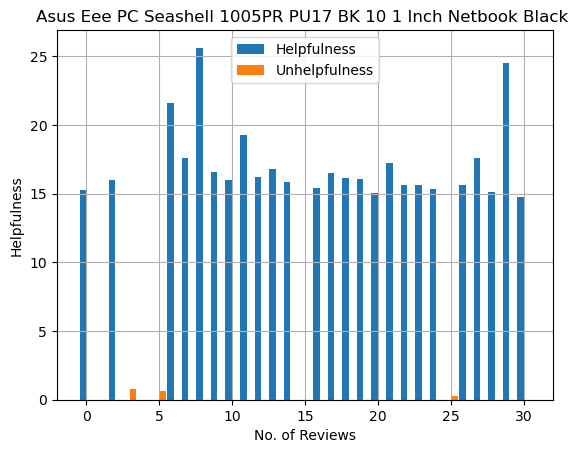

In [191]:

# Define the width of the bars
bar_width = 0.45
indices = np.arange(len(x))
plt.bar(indices - bar_width/2, x, bar_width, label='Helpfulness')
plt.bar(indices + bar_width/2, y, bar_width, label='Unhelpfulness')
plt.xlabel('No. of Reviews')
plt.ylabel('Helpfulness')
plt.title(title)
plt.legend()
plt.grid()
plt.show()


['neutral (3)', 'helpful (25)', 'unhelpful (3)']


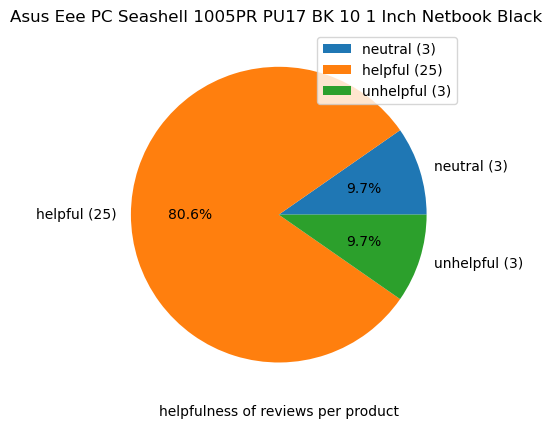

In [195]:
# indices = np.arange(len(x))
pie_array = [total_neutral, total_helpful, total_unhelpful]
pie_labels = ['neutral', 'helpful', 'unhelpful']
# Calculate total value
total = sum(pie_array)

# Concatenate total value with labels
labels_with_total = [f'{label} ({size})' for label, size in zip(pie_labels, pie_array)]
# labels_with_total.append(f'Total: {total}')
print(labels_with_total)
plt.pie(pie_array, labels=labels_with_total, autopct='%1.1f%%')

# plt.plot(indices - bar_width/2, helpful, bar_width, label=f'total reviews ({total_reviews})', marker='o', linestyle='-')
# plt.bar(indices + bar_width/2, unhelpful, bar_width, label=f"helpful votes ({total_helpful})")
# Define the width of the bars
# bar_width = 0.2  # Adjust as needed

# Create an array of indices for the bars
# indices = np.arange(len(x))

# Plot all arrays as bars
# plt.bar(indices - bar_width, helpful, bar_width, label='Helpfulness')
# plt.bar(indices, unhelpful, bar_width, label='Unhelpfulness')
# plt.bar(indices + bar_width, , bar_width, label='No. of Votes')

# plt.xlabel('No. of Reviews')
plt.xlabel('helpfulness of reviews per product')
plt.title(title)
# plt.legend(loc='upper left', fontsize='medium')
plt.legend()

plt.grid()
plt.show()